In [83]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from time import time
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.feature_extraction.text import CountVectorizer
import json
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_selection import chi2
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
with open("train.json") as f:
    datastore = json.loads(f.read())
f.close()
with open("test.json") as f:
    test = json.loads(f.read())
f.close()
print(type(datastore[0]))
print(datastore[0])
print("\nNumber of recipes: ",len(datastore),"\n")
print(datastore[0]['ingredients'])
print(len(datastore[0]['ingredients']))
length = len(datastore)
length1 = len(test)
max = 0
pos = 0
for x in range(length):
    if(len(datastore[x]['ingredients']) > max):
        max = len(datastore[x]['ingredients'])
        pos = x
print(max)
print(datastore[pos]['id'])
print(length)

<class 'dict'>
{'id': 10259, 'cuisine': 'greek', 'ingredients': ['romaine lettuce', 'black olives', 'grape tomatoes', 'garlic', 'pepper', 'purple onion', 'seasoning', 'garbanzo beans', 'feta cheese crumbles']}

Number of recipes:  39774 

['romaine lettuce', 'black olives', 'grape tomatoes', 'garlic', 'pepper', 'purple onion', 'seasoning', 'garbanzo beans', 'feta cheese crumbles']
9
65
3885
39774


In [85]:
cuisine = []
ingre = []
full = []
for i in range(length):
    cuisine.append(datastore[i]['cuisine'])
    for j in range(len(datastore[i]['ingredients'])):
        ingre.append(datastore[i]['ingredients'][j])
    li = [y for y in ingre]
    li = ",".join(map(str, li))
    full.append(li)
    ingre = []
    #if(i == 5000):
    #    break
    if(i%5000 == 0):
        print(i)
df = pd.DataFrame({'cuisine':cuisine,'ingredients':full})
for i in df.loc[0]:
    print(i)
#print(df.head())
#df.groupby('cuisine').cuisine.count().plot.bar(ylim=0)
#plt.show()



0
5000
10000
15000
20000
25000
30000
35000
greek
romaine lettuce,black olives,grape tomatoes,garlic,pepper,purple onion,seasoning,garbanzo beans,feta cheese crumbles


In [86]:
print(df.head())
df1 = df.copy()
cuis = np.unique(df1['cuisine'].values)
print(cuis)
print(cuis[0])
b = {cuis[i]:i for i in range(len(cuis))}
print(b)
df1 = df1.replace({'cuisine':b})
print(df1.head())

       cuisine                                        ingredients
0        greek  romaine lettuce,black olives,grape tomatoes,ga...
1  southern_us  plain flour,ground pepper,salt,tomatoes,ground...
2     filipino  eggs,pepper,salt,mayonaise,cooking oil,green c...
3       indian                     water,vegetable oil,wheat,salt
4       indian  black pepper,shallots,cornflour,cayenne pepper...
['brazilian' 'british' 'cajun_creole' 'chinese' 'filipino' 'french'
 'greek' 'indian' 'irish' 'italian' 'jamaican' 'japanese' 'korean'
 'mexican' 'moroccan' 'russian' 'southern_us' 'spanish' 'thai'
 'vietnamese']
brazilian
{'brazilian': 0, 'british': 1, 'cajun_creole': 2, 'chinese': 3, 'filipino': 4, 'french': 5, 'greek': 6, 'indian': 7, 'irish': 8, 'italian': 9, 'jamaican': 10, 'japanese': 11, 'korean': 12, 'mexican': 13, 'moroccan': 14, 'russian': 15, 'southern_us': 16, 'spanish': 17, 'thai': 18, 'vietnamese': 19}
   cuisine                                        ingredients
0        6  romaine 

In [87]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,norm='l2',\
                       encoding='latin-1',ngram_range=(1,2))
print(df1['ingredients'][0])
features = tfidf.fit_transform(df1.ingredients).toarray()
labels = df1['cuisine']
print(features.shape)


romaine lettuce,black olives,grape tomatoes,garlic,pepper,purple onion,seasoning,garbanzo beans,feta cheese crumbles
(39774, 17927)


In [94]:
print(df1['ingredients'].head())
print(df1['cuisine'].head())
X_train, X_test, y_train, y_test =\
train_test_split(df1['ingredients'],\
                 df1['cuisine'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf1 = tfidf.fit_transform(X_train)

0    romaine lettuce,black olives,grape tomatoes,ga...
1    plain flour,ground pepper,salt,tomatoes,ground...
2    eggs,pepper,salt,mayonaise,cooking oil,green c...
3                       water,vegetable oil,wheat,salt
4    black pepper,shallots,cornflour,cayenne pepper...
Name: ingredients, dtype: object
0     6
1    16
2     4
3     7
4     7
Name: cuisine, dtype: int64


In [89]:
print((X_train.head()))
print(X_train_counts)
print(X_train_tfidf)

5110     ground black pepper,pizza doughs,olive oil,gar...
26915    olive oil,onions,lime juice,salt,chopped cilan...
16284    white onion,whole milk,taco seasoning,ground b...
9538     vanilla beans,red wine,sugar,large egg yolks,a...
4243     pepper,butter,grated parmesan cheese,salt,minc...
Name: ingredients, dtype: object
  (0, 2224)	1
  (0, 849)	1
  (0, 1082)	1
  (0, 489)	2
  (0, 1841)	1
  (0, 1123)	1
  (0, 1909)	1
  (0, 1044)	1
  (0, 1758)	1
  (0, 1765)	1
  (0, 806)	1
  (0, 1968)	1
  (0, 1891)	1
  (0, 232)	1
  (0, 1147)	1
  (1, 723)	1
  (1, 190)	1
  (1, 2121)	1
  (1, 2631)	1
  (1, 494)	1
  (1, 1175)	1
  (1, 308)	1
  (1, 503)	1
  (1, 2361)	1
  (1, 266)	1
  :	:
  (29828, 1854)	1
  (29828, 1491)	1
  (29828, 1668)	1
  (29828, 1009)	1
  (29828, 1283)	1
  (29828, 2394)	1
  (29828, 2340)	1
  (29828, 2247)	1
  (29828, 181)	1
  (29828, 2276)	1
  (29828, 542)	1
  (29828, 489)	1
  (29828, 1758)	1
  (29828, 1765)	1
  (29828, 1968)	1
  (29828, 1147)	1
  (29829, 1352)	1
  (29829, 130)	1
  (298

In [96]:
clf = MultinomialNB().fit(X_train_tfidf, y_train)
lgr = LogisticRegression(random_state=0).fit(X_train_tfidf, y_train)
lsvc = LinearSVC().fit(X_train_tfidf,y_train)
#lsvc1 = LinearSVC().fit(X_train_tfidf1,y_train)

In [91]:
str1 = datastore[1]['ingredients']
print(str1)
str1 = ",".join(map(str, str1))
print(str1)
print( cuis[(clf.predict(count_vect.transform([str1])))] )

['plain flour', 'ground pepper', 'salt', 'tomatoes', 'ground black pepper', 'thyme', 'eggs', 'green tomatoes', 'yellow corn meal', 'milk', 'vegetable oil']
plain flour,ground pepper,salt,tomatoes,ground black pepper,thyme,eggs,green tomatoes,yellow corn meal,milk,vegetable oil
['southern_us']


In [78]:
# <!-- collapse=True -->

# Modified from http://scikit-learn.org/stable/auto_examples/plot_learning_curve.html
from sklearn.learning_curve import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects
    """
    
    plt.figure()
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=1, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid("on") 
    if ylim:
        plt.ylim(ylim)
    plt.title(title)

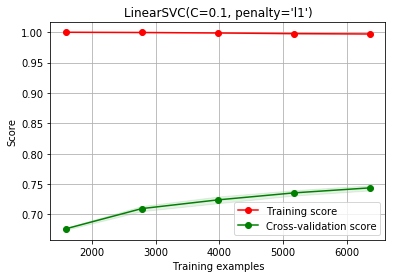

In [80]:
plot_learning_curve(LinearSVC(), 
                    "LinearSVC(C=0.1, penalty='l1')", 
                    features, labels,
                    train_sizes=np.linspace(.05, 0.2, 5))

In [9]:
CV = 1
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

for model in models:
    accuracy = cross_val_score(model,features,labels,\
                            scoring='accuracy',cv=2)
    print(str(model),":",accuracy)
    print("\n\n")

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False) : [0.32921128 0.32649263]



LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0) : [0.77771075 0.77023289]



MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) : [0.60267431 0.60696142]



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          ve

In [36]:
id1 = []
ingre1 = []
full1 = []
for i in range(length1):
    id1.append(test[i]['id'])
    for j in range(len
                   (test[i]['ingredients'])):
        ingre1.append(test[i]['ingredients'][j])
    li1 = [y for y in ingre1]
    li1 = ",".join(map(str, li1))
    full1.append(li1)
    ingre1 = []
    #if(i == 5000):
    #    break
    if(i%5000 == 0):
        print(i)
        
full2 = []
for k in range(len(full1)):
    full2.append(full1[k])

df2 = pd.DataFrame({'id':id1,'ingredients':full1})
print(df2.head())
print(df2['ingredients'][0])
ans = []

print("\n\n")
print(full2[:2])
print("\n\n\n")

for k in range(len(full1)):
    ans.append((cuis[(\
    clf.predict(count_vect.transform([full1[k]])))]))

out = pd.DataFrame({'id':df2['id'], 'cuisine':ans})
'''df2['ingredients'] = ",".join(map(str, df2['ingredients']))
print(df2.head())
ans = pd.DataFrame(columns=['cuisine'])
k = 0
print(df2['ingredients'][0])
print("\t\t\tTesting")'''
'''for i in df2['ingredients']:
    temp = pd.DataFrame(columns=['cuisine'])
    temp['cuisine'] = (cuis[(\
    clf.predict(count_vect.transform([i])))])
    #print(i)
    print(temp)
    ans = ans.append(temp)
    k+=10
    if(k == 1):
        break'''
#print(ans)
print(out.head())
out['cuisine'] = out['cuisine'].str[0]
print(out.head())

0
5000
      id                                        ingredients
0  18009  baking powder,eggs,all-purpose flour,raisins,m...
1  28583  sugar,egg yolks,corn starch,cream of tartar,ba...
2  41580  sausage links,fennel bulb,fronds,olive oil,cub...
3  29752  meat cuts,file powder,smoked sausage,okra,shri...
4  35687  ground black pepper,salt,sausage casings,leeks...
baking powder,eggs,all-purpose flour,raisins,milk,white sugar



['baking powder,eggs,all-purpose flour,raisins,milk,white sugar', 'sugar,egg yolks,corn starch,cream of tartar,bananas,vanilla wafers,milk,vanilla extract,toasted pecans,egg whites,light rum']




          cuisine     id
0   [southern_us]  18009
1   [southern_us]  28583
2       [italian]  41580
3  [cajun_creole]  29752
4       [italian]  35687
        cuisine     id
0   southern_us  18009
1   southern_us  28583
2       italian  41580
3  cajun_creole  29752
4       italian  35687


In [37]:
file = "submission.csv"
out.to_csv(file,index=False)

In [41]:
id1 = []
ingre1 = []
full1 = []
for i in range(length1):
    id1.append(test[i]['id'])
    for j in range(len
                   (test[i]['ingredients'])):
        ingre1.append(test[i]['ingredients'][j])
    li1 = [y for y in ingre1]
    li1 = ",".join(map(str, li1))
    full1.append(li1)
    ingre1 = []
    #if(i == 5000):
    #    break
    if(i%5000 == 0):
        print(i)
        
full2 = []
for k in range(len(full1)):
    full2.append(full1[k])

df2 = pd.DataFrame({'id':id1,'ingredients':full1})
print(df2.head())
print(df2['ingredients'][0])
ans = []

print("\n\n")
print(full2[:2])
print("\n\n\n")

for k in range(len(full1)):
    ans.append((cuis[(\
    lgr.predict(count_vect.transform([full1[k]])))]))

out = pd.DataFrame({'id':df2['id'], 'cuisine':ans})
'''df2['ingredients'] = ",".join(map(str, df2['ingredients']))
print(df2.head())
ans = pd.DataFrame(columns=['cuisine'])
k = 0
print(df2['ingredients'][0])
print("\t\t\tTesting")'''
'''for i in df2['ingredients']:
    temp = pd.DataFrame(columns=['cuisine'])
    temp['cuisine'] = (cuis[(\
    clf.predict(count_vect.transform([i])))])
    #print(i)
    print(temp)
    ans = ans.append(temp)
    k+=10
    if(k == 1):
        break'''
#print(ans)
print(out.head())
out['cuisine'] = out['cuisine'].str[0]
print(out.head())

0
5000
      id                                        ingredients
0  18009  baking powder,eggs,all-purpose flour,raisins,m...
1  28583  sugar,egg yolks,corn starch,cream of tartar,ba...
2  41580  sausage links,fennel bulb,fronds,olive oil,cub...
3  29752  meat cuts,file powder,smoked sausage,okra,shri...
4  35687  ground black pepper,salt,sausage casings,leeks...
baking powder,eggs,all-purpose flour,raisins,milk,white sugar



['baking powder,eggs,all-purpose flour,raisins,milk,white sugar', 'sugar,egg yolks,corn starch,cream of tartar,bananas,vanilla wafers,milk,vanilla extract,toasted pecans,egg whites,light rum']




          cuisine     id
0       [british]  18009
1   [southern_us]  28583
2       [italian]  41580
3  [cajun_creole]  29752
4       [italian]  35687
        cuisine     id
0       british  18009
1   southern_us  28583
2       italian  41580
3  cajun_creole  29752
4       italian  35687


In [42]:
file = "submission2.csv"
out.to_csv(file,index=False)

In [11]:
id1 = []
ingre1 = []
full1 = []
for i in range(length1):
    id1.append(test[i]['id'])
    for j in range(len
                   (test[i]['ingredients'])):
        ingre1.append(test[i]['ingredients'][j])
    li1 = [y for y in ingre1]
    li1 = ",".join(map(str, li1))
    full1.append(li1)
    ingre1 = []
    #if(i == 5000):
    #    break
    if(i%5000 == 0):
        print(i)
        
full2 = []
for k in range(len(full1)):
    full2.append(full1[k])

df2 = pd.DataFrame({'id':id1,'ingredients':full1})
print(df2.head())
print(df2['ingredients'][0])
ans = []

print("\n\n")
print(full2[:2])
print("\n\n\n")

for k in range(len(full1)):
    ans.append((cuis[(\
    lsvc.predict(count_vect.transform([full1[k]])))]))

out = pd.DataFrame({'id':df2['id'], 'cuisine':ans})
'''df2['ingredients'] = ",".join(map(str, df2['ingredients']))
print(df2.head())
ans = pd.DataFrame(columns=['cuisine'])
k = 0
print(df2['ingredients'][0])
print("\t\t\tTesting")'''
'''for i in df2['ingredients']:
    temp = pd.DataFrame(columns=['cuisine'])
    temp['cuisine'] = (cuis[(\
    clf.predict(count_vect.transform([i])))])
    #print(i)
    print(temp)
    ans = ans.append(temp)
    k+=10
    if(k == 1):
        break'''
#print(ans)
print(out.head())
out['cuisine'] = out['cuisine'].str[0]
print(out.head())

0
5000
      id                                        ingredients
0  18009  baking powder,eggs,all-purpose flour,raisins,m...
1  28583  sugar,egg yolks,corn starch,cream of tartar,ba...
2  41580  sausage links,fennel bulb,fronds,olive oil,cub...
3  29752  meat cuts,file powder,smoked sausage,okra,shri...
4  35687  ground black pepper,salt,sausage casings,leeks...
baking powder,eggs,all-purpose flour,raisins,milk,white sugar



['baking powder,eggs,all-purpose flour,raisins,milk,white sugar', 'sugar,egg yolks,corn starch,cream of tartar,bananas,vanilla wafers,milk,vanilla extract,toasted pecans,egg whites,light rum']




          cuisine     id
0       [british]  18009
1   [southern_us]  28583
2       [italian]  41580
3  [cajun_creole]  29752
4       [italian]  35687
        cuisine     id
0       british  18009
1   southern_us  28583
2       italian  41580
3  cajun_creole  29752
4       italian  35687


In [ ]:
file = "submission3.csv"
out.to_csv(file,index=False)
#Score 0.73: